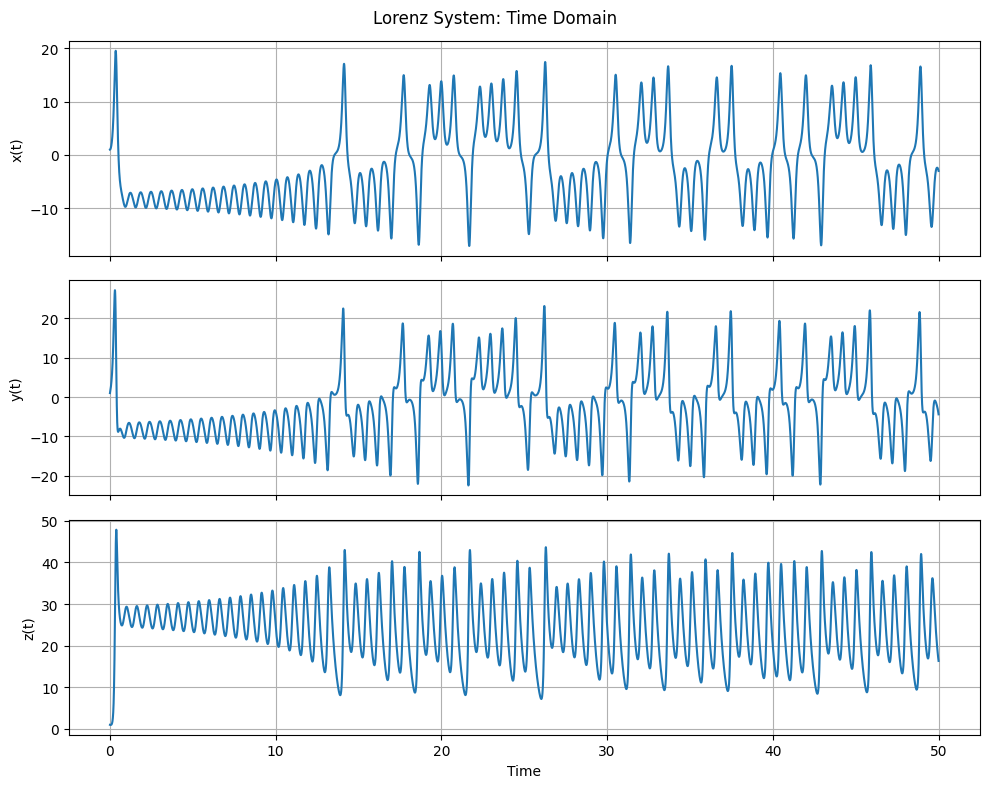

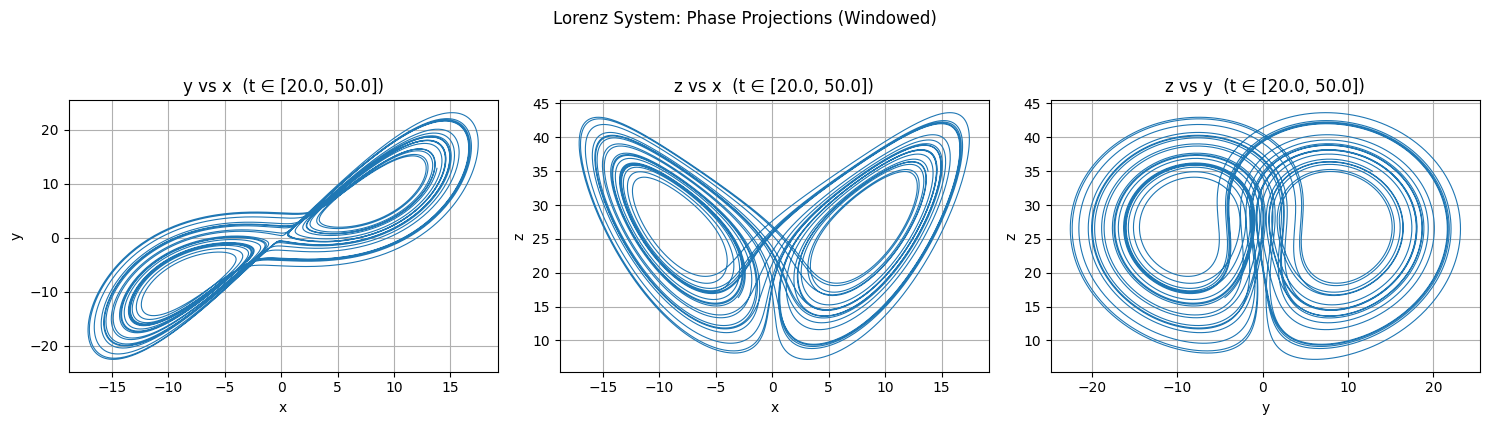

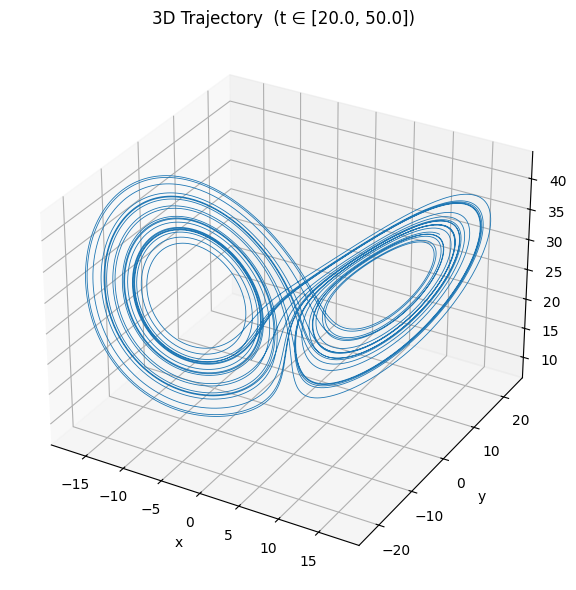

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ----------------------------
# User options
# ----------------------------
a = 10.0
b = 28.0
c = 8.0 / 3.0

t0, tf = 0.0, 50.0
npts = 20000
s0 = [1.0, 1.0, 1.0]

# Phase/3D plotting window (exclude transients)
t_phase_start = 20.0
t_phase_stop  = 50.0
# ----------------------------

def f(t, s):
    x, y, z = s
    return [
        a * (y - x),
        b * x - y - x * z,
        x * y - c * z,
    ]

t_eval = np.linspace(t0, tf, npts)

sol = solve_ivp(
    f,
    (t0, tf),
    s0,
    t_eval=t_eval,
    method="RK45",
    rtol=1e-8,
    atol=1e-10,
)

t = sol.t
x, y, z = sol.y

# Mask for phase/3D plots
mask = (t >= t_phase_start) & (t <= t_phase_stop)
xw, yw, zw = x[mask], y[mask], z[mask]

# ---- Time-domain plots: x(t), y(t), z(t) over full time
fig1, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(t, x)
axes[0].set_ylabel("x(t)")
axes[0].grid(True)

axes[1].plot(t, y)
axes[1].set_ylabel("y(t)")
axes[1].grid(True)

axes[2].plot(t, z)
axes[2].set_ylabel("z(t)")
axes[2].set_xlabel("Time")
axes[2].grid(True)

fig1.suptitle("Lorenz System: Time Domain", y=0.98)
fig1.tight_layout()

# ---- Phase plots: y vs x, z vs x, z vs y over selected time window
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 4))

axes2[0].plot(xw, yw, linewidth=0.8)
axes2[0].set_xlabel("x")
axes2[0].set_ylabel("y")
axes2[0].set_title(f"y vs x  (t ∈ [{t_phase_start}, {t_phase_stop}])")
axes2[0].grid(True)

axes2[1].plot(xw, zw, linewidth=0.8)
axes2[1].set_xlabel("x")
axes2[1].set_ylabel("z")
axes2[1].set_title(f"z vs x  (t ∈ [{t_phase_start}, {t_phase_stop}])")
axes2[1].grid(True)

axes2[2].plot(yw, zw, linewidth=0.8)
axes2[2].set_xlabel("y")
axes2[2].set_ylabel("z")
axes2[2].set_title(f"z vs y  (t ∈ [{t_phase_start}, {t_phase_stop}])")
axes2[2].grid(True)

fig2.suptitle("Lorenz System: Phase Projections (Windowed)", y=1.05)
fig2.tight_layout()

# ---- 3D plot: x vs y vs z over selected time window
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111, projection="3d")
ax3.plot(xw, yw, zw, linewidth=0.6)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.set_title(f"3D Trajectory  (t ∈ [{t_phase_start}, {t_phase_stop}])")

fig3.tight_layout()

plt.show()
